<a href="https://colab.research.google.com/github/Theveetha/Mushroom_Classification/blob/main/Mushroom_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MUSHROOM CLASSIFICATION**
## *Edifungi - Safegaurd foragers by Distinguishing poisonous from edible mushroom*

**GOAL:**
1. Do a detailed analysis to identify and visualize which factors contribute to the mushroom classification.
2. Perform model prediction for various models and find the best among them.

**INDEX:**
* [Data Gathering](#Data_Gathering)
* [Data Understanding](#Data_Understanding)
* [Exploratory Data Analysis](#Exploratory_Data_Analysis)
* [Data Preprocessing](#Data_Preprocessing)
* [Data Modeling](#Data_Modeling)
* [Model Evaluation](#Model_Evaluation)

<a name="Data_Gathering"></a>
## **DATA GATHERING**
**GOAL:**
1. Import required libraries for our analysis
2. Connect to the drive and load the dataset
3. Information about the metadata

### **Import Required Libraries**

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# import xgboost as XGBClassifier
import xgboost as xgb

from sklearn.metrics import RocCurveDisplay
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings('ignore')

# Set max columns and rows
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

### **Mount Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Import the Dataset**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/EdiFungi/EdiFungi_Data.csv')

# Data Dimension
print(f"Dataset provided has {df.shape[0]} rows and {df.shape[1]} columns")

df.head()

Dataset provided has 61069 rows and 21 columns


,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w


### **Data Description**

Below we have detailed description of each variables provided in the dataset

| Variable Name        | Variable Information | Description                     | Additional Information                                                                 |
|----------------------|----------------------|---------------------------------|-----------------------------------------------------------------------------------------|
| class                | Binary               | Mushroom Classification         | poisonous = p, edible = e                                                               |
| cap-diameter         | Metrical             | Cap Diameter                    | float number in cm                                                                      |
| cap-shape            | Nominal              | Cap Shape                       | bell=b, conical=c, convex=x, flat=f, sunken=s, spherical=p, others=o                    |
| cap-surface          | Nominal              | Cap Surface                     | fibrous=i, grooves=g, scaly=y, smooth=s, shiny=h, leathery=l, silky=k, sticky=t, wrinkled=w, fleshy=e |
| cap-color            | Nominal              | Cap Color                       | brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o, black=k |
| does-bruise-or-bleed | Nominal              | Bruise or Bleed (Yes/No)         | bruises-or-bleeding=t, no=f                                                             |
| gill-attachment      | Nominal              | Gill Attachment                 | adnate=a, adnexed=x, decurrent=d, free=e, sinuate=s, pores=p, none=f, unknown=?         |
| gill-spacing         | Nominal              | Gill Spacing                    | close=c, distant=d, none=f                                                              |
| gill-color           | Nominal              | Gill Color                      | brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o, black=k, none=f |
| stem-height          | Metrical             | Stem Height                     | float number in cm                                                                      |
| stem-width           | Metrical             | Stem Width                      | float number in mm                                                                      |
| stem-root            | Nominal              | Stem Root                       | bulbous=b, swollen=s, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r                   |
| stem-surface         | Nominal              | Stem Surface                    | fibrous=i, grooves=g, scaly=y, smooth=s, shiny=h, leathery=l, silky=k, sticky=t, wrinkled=w, fleshy=e, none=f |
| stem-color           | Nominal              | Stem Color                      | brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o, black=k, none=f |
| veil-type            | Nominal              | Veil Type                       | partial=p, universal=u                                                                  |
| veil-color           | Nominal              | Veil Color                      | brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o, black=k, none=f |
| has-ring             | Nominal              | Has Ring (Yes/No)               | ring=t, none=f                                                                          |
| ring-type            | Nominal              | Ring Type                       | cobwebby=c, evanescent=e, flaring=r, grooved=g, large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=? |
| spore-print-color    | Nominal              | Spore Print Color               | brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o, black=k |
| habitat              | Nominal              | Habitat                         | grasses=g, leaves=l, meadows=m, paths=p, heaths=h, urban=u, waste=w, woods=d            |
| season               | Nominal              | Season                          | spring=s, summer=u, autumn=a, winter=w                                                  |

<a name="Data_Understanding"></a>
## **DATA UNDERSTANDING**
**GOAL:**
1. Define functions which will come handy in our project
2. Understand the structure of the data
3. Examine the datatypes and perform type casting if required
4. Summarize the data and visualize the frequency distribution (to check skew)

### **Functions**

In [4]:
# Function to extract information on all the columns

def info(data):
  cols = data.columns
  dtype = data.dtypes
  unique_count = [data[col].nunique() for col in cols]
  missing_per = round(data.isnull().mean() * 100,2)
  sample = data.head(2).T
  cat_unique_values = [data[col].unique() if data[col].dtype == 'object' else 'NA' for col in cols]

  data_info = pd.DataFrame({'Column_Name':cols
                            ,'Data_Type':dtype
                            ,'Unique_Value_Count':unique_count
                            ,'Categorical_Unique_Values':cat_unique_values
                            ,'Missing_Percentage':missing_per
                            })
  data_info = pd.concat([data_info,sample],axis=1)
  data_info.rename(columns={0:'Sample_data_1',
                            1:'Sample_data_2'}
                  ,inplace=True)
  data_info.reset_index(drop=True,inplace=True)

  return data_info

In [5]:
# Function to remove the border in graph
def section(sec):
  sec.spines['bottom'].set_visible(True)
  sec.spines['top'].set_visible(False)
  sec.spines['left'].set_visible(False)
  sec.spines['right'].set_visible(False)
  return sec

In [6]:
# Function to remove content for empty subplot
def empty_subplot(sec):
  sec.xaxis.set_visible(False)
  sec.yaxis.set_visible(False)
  for position in ['bottom','top','left','right']:
    sec.spines[position].set_visible(False)

In [7]:
# Function to remove grid lines
def gridlines(sec):
  sec.grid(axis='y',linestyle=':',color='black',alpha=0.3)

In [8]:
# Function to record scores for model predictions in a DataFrame
def performance_metrics_recorder(predictions, y_test, df, model_name):
    model_accuracy_score = round((accuracy_score(y_test, predictions))*100,2)
    model_precision_score = round((precision_score(y_test, predictions))*100,2)
    model_recall_score = round((recall_score(y_test, predictions))*100,2)
    model_f1_score = round((f1_score(y_test, predictions))*100,2)
    model_roc_auc = round((roc_auc_score(y_test, predictions))*100,2)
    model_confusion = confusion_matrix(y_test, predictions)

    df.loc[len(df)] = [model_name,model_accuracy_score,model_precision_score,model_recall_score,model_f1_score,model_roc_auc]

    return(df, model_confusion)

In [9]:
# Function to fit model to training data and generate predictions
def model_predictions(model, x_train, x_test, y_train, y_test, df, model_name):
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    df, model_confusion = performance_metrics_recorder(predictions, y_test, df, model_name)

    return (model, df, model_confusion)

In [10]:
# Function to display confusion matrix
confusion_lbs = ['Edible','Poisonous']
def model_report(confusion_matrix, confusion_lbs, label):

  disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=confusion_lbs)

  disp.plot(cmap='Pastel2')
  for text in disp.text_.ravel():
    text.set_color('black')
  plt.title(f'Confusion Matrix of {label}')
  plt.tight_layout()
  plt.show()

### **Detailed Analysis on all the columns**

Check the dimensions

In [11]:
print(f"Number of Rows: {df.shape[0]}\nNumber of Columns: {df.shape[1]}")

Number of Rows: 61069
Number of Columns: 21


Basic information about each column available in the dataset

In [12]:
table_info = info(df)
table_info

,Column_Name,Data_Type,Unique_Value_Count,Categorical_Unique_Values,Missing_Percentage,Sample_data_1,Sample_data_2
0,class,object,2,"[p, e]",0.00,p,p
1,cap-diameter,float64,2571,NA,0.00,15.26,16.6
2,cap-shape,object,7,"[x, f, p, b, c, s, o]",0.00,x,x
3,cap-surface,object,11,"[g, h, nan, t, y, e, s, l, d, w, i, k]",23.12,g,g
4,cap-color,object,12,"[o, e, n, g, r, w, y, p, u, b, l, k]",0.00,o,o
5,does-bruise-or-bleed,object,2,"[f, t]",0.00,f,f
6,gill-attachment,object,7,"[e, nan, a, d, s, x, p, f]",16.18,e,e
7,gill-spacing,object,3,"[nan, c, d, f]",41.04,NaN,NaN
8,gill-color,object,12,"[w, n, p, u, b, g, y, r, e, o, k, f]",0.00,w,w
9,stem-height,float64,2226,NA,0.00,16.95,17.99


Visualization for percentage of missing values

![My Image](https://drive.google.com/uc?id=1KB2XvJEhv0940lTTICBH9pmQvOqp-iid)

Numerical and Categorical columns information

In [13]:
num_cols = table_info[table_info['Data_Type'] != 'object']['Column_Name'].tolist()
cat_cols = table_info[table_info['Data_Type'] == 'object']['Column_Name'].tolist()
print(f'Number of Numerical Columns: {len(num_cols)}')
print(f'Number of Categorical Columns: {len(cat_cols)}')

Number of Numerical Columns: 3
Number of Categorical Columns: 18


Duplicate Rows check

In [14]:
count = df[df.duplicated()].shape
print(f"There are no duplicates in the dataset" if count[0]==0 else f"There are {count[0]} duplicates in the dataset")

There are 146 duplicates in the dataset


Five point Summary

In [15]:
df[num_cols].describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


Frequency Distribution in Numerical columns

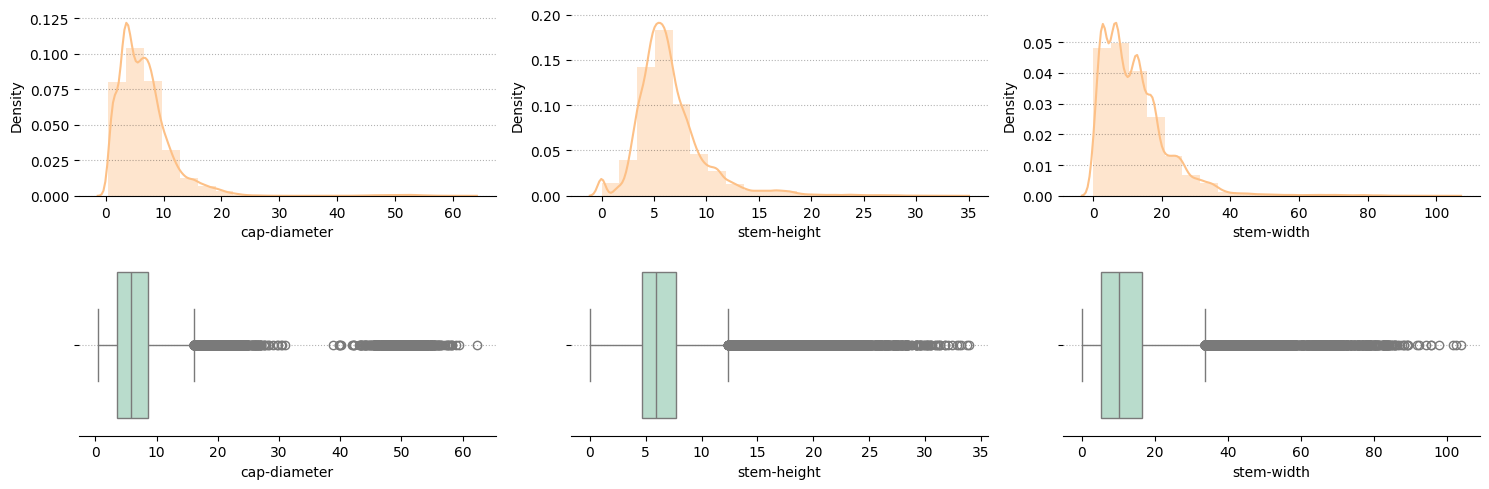

In [16]:
# For understanding the distribution among Numerical variables we will create bins
fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(15,5))
axes = axes.flatten()

for i,cols in enumerate(num_cols):
  sns.distplot(ax=axes[i],x=df[cols],bins=20,color='#FDC086')
  section(axes[i])
  gridlines(axes[i])
  axes[i].set_xlabel(cols)

for i,cols in enumerate(num_cols):
  sns.boxplot(ax=axes[i+3],data=df,x=cols,color='#B3E2CD')
  section(axes[i+3])
  gridlines(axes[i+3])
  axes[i+3].set_xlabel(cols)

plt.tight_layout()
plt.show()

Below code outout we can see that the outliers are almost equally distributed between each class

In [17]:
# Getting the value counts for each condition
cap_diameter_count = df[df['cap-diameter'] >= 15]['class'].value_counts()
stem_height_count = df[df['stem-height'] >= 13]['class'].value_counts()
stem_width_count = df[df['stem-width'] >= 30]['class'].value_counts()

# Combining these series into a DataFrame
outliers = pd.DataFrame({
    'cap_diameter_count': cap_diameter_count,
    'stem_height_count': stem_height_count,
    'stem_width_count': stem_width_count
})

outliers

,cap_diameter_count,stem_height_count,stem_width_count
class,,,
e,1902,1503,1465
p,1243,1189,1603


### **OBSERVATION**
1. Typecasting is not required as each column is mapped to its corresponding datatype
2. There are no missing values in the binary or numerical columns
3. Columns having missing values are cap-surface, gill-attachment, gill-spacing, stem-root, stem-surface, veil-type, veil-color, ring-type, spore-print-color. Among these 9 columns 5 columns have more than 60% of missing data which needs to be handled in future
4. There are 3 numerical columns and 18 categorical columns
5. We can see that there are 146 duplicates in the dataset which needs to be removed later
6. The boxplot reveals that this is a skewed dataset with many outliers. This needs to be handled via normal distribution while model building
7. From description we can see that cap-diameter and stem-height are in centimeters(cm) whereas stem-width are in millimeters(mm). For consistency we need to conver millimeters to centimeters

<a name="Exploratory_Data_Analysis"></a>
## **EXPLORATORY DATA ANALYSIS**
**GOAL:**
1. Do fundamental data cleaning and data transformation for handling missing data, remove duplicates and outliers treatment if required
2. Visualize the Data by univariate analysis and bivariate analysis for all the variables with respect to the target variable (Class)
3. Analyse the target variable to see if its balanced or not
4. Check on how individual variables play a role to affect the classification of the mushroom

### **Data Cleaning and Transformation**

For analysis purpose we are copying the dataset to do modification on it, so the original data remains intact

In [18]:
# Creating a copy
df_copy = df.copy()
df_copy.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w


Handling missing value
- Delete the columns which is having more than 40% missing value as they don't contribute much in model building
- For categorical columns having less than 40% replace the null value with mode

In [19]:
# Remove columns
rem_cols = table_info[table_info['Missing_Percentage'] >= 40]['Column_Name'].to_list()
df_copy.drop(columns=rem_cols,inplace=True)
print("Columns to remove:")
for i,col in enumerate(rem_cols):
  print(f"{i+1}. {col}")
print("******"*10)
print(f"Number of Columns: {df_copy.shape[0]}\nNumber of Rows: {df_copy.shape[1]}")

Columns to remove:
1. gill-spacing
2. stem-root
3. stem-surface
4. veil-type
5. veil-color
6. spore-print-color
************************************************************
Number of Columns: 61069
Number of Rows: 15


In [20]:
# Handle missing data
print("Columns to handle null values:")
null_cols = table_info[(table_info['Missing_Percentage'] > 0) & (table_info['Missing_Percentage'] < 40) & (table_info['Data_Type'] == 'object')]['Column_Name'].to_list()
for i,col in enumerate(null_cols):
  print(f"{i+1}. {col}")

for col in null_cols:
  df_copy[col].fillna(df_copy[col].mode()[0],inplace=True)

Columns to handle null values:
1. cap-surface
2. gill-attachment
3. ring-type


In [21]:
# Remove Duplicate
df_copy.drop_duplicates(inplace=True)
print(f"Number of Rows: {df_copy.shape[0]}\nNumber of Columns: {df_copy.shape[1]}")

Number of Rows: 60923
Number of Columns: 15


Linear models (Logistic Regression) and distance-based models (KNN and SVM) are sensitive to outliers. In these cases, outliers can disproportionately affect the model, leading to poor predictions. In such cases we have to treat outliers in case if required for fine tunning

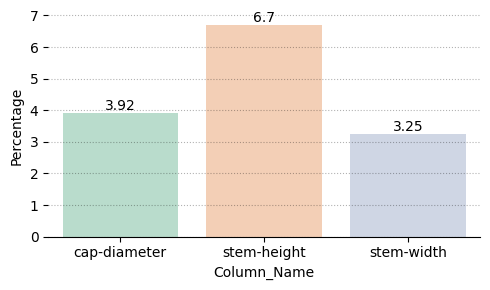

In [22]:
# Calulate 25th (Q1) and 75th (Q3) percentile
Q1 = df_copy[num_cols].quantile(0.25)
Q3 = df_copy[num_cols].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define upper and lower boundaries
upper_boundary = Q3 + (1.5 * IQR)
lower_boundary = Q1 - (1.5 * IQR)

# Identify outliers for each column
outliers = pd.DataFrame(df_copy[num_cols].apply(lambda x: (x < lower_boundary[x.name]) | (x > upper_boundary[x.name])))

# Calculate the percentage of outliers for each column
outlier_percentage = pd.DataFrame(round((outliers.sum() / df_copy[num_cols].shape[0]) * 100,2))
outlier_percentage.rename(columns={0:'Percentage'},inplace=True)

# Visualisation for outliers
plt.figure(figsize=(5,3))
barplot = sns.barplot(data=outlier_percentage,x=outlier_percentage.index,y='Percentage',palette='Pastel2')
plt.xlabel("Column_Name")
for i in range(0,3):
  barplot.bar_label(barplot.containers[i])
section(barplot)
gridlines(barplot)
plt.tight_layout()
plt.show()

Here we can see that the outliers percentage is less than 7% it will not significantly impact our analysis or business decision making. Still for our analysis purpose we go ahead and proceed with our outlier treatment

In [23]:
# df_outlier = df_copy.copy()
df_copy[num_cols] = df_copy[num_cols].apply(lambda x: x.clip(lower=lower_boundary[x.name], upper=upper_boundary[x.name]))
outliers_capped = pd.DataFrame(df_copy[num_cols].apply(lambda x: (x < lower_boundary[x.name]) | (x > upper_boundary[x.name])))
outlier_percentage = pd.DataFrame(round((outliers_capped.sum() / df_copy[num_cols].shape[0]) * 100,2))
print("Outlier percentage post outliers treatment:")
outlier_percentage

Outlier percentage post outliers treatment:


,0
cap-diameter,0.0
stem-height,0.0
stem-width,0.0


In [24]:
table_info = info(df_copy)
num_cols = table_info[table_info['Data_Type'] != 'object']['Column_Name'].tolist()
cat_cols = table_info[table_info['Data_Type'] == 'object']['Column_Name'].tolist()
print(f'Number of Numerical Columns: {len(num_cols)}')
print(f'Number of Categorical Columns: {len(cat_cols)}')
table_info

Number of Numerical Columns: 3
Number of Categorical Columns: 12


,Column_Name,Data_Type,Unique_Value_Count,Categorical_Unique_Values,Missing_Percentage,Sample_data_1,Sample_data_2
0,class,object,2,"[p, e]",0.0,p,p
1,cap-diameter,float64,1569,NA,0.0,15.26,16.14
2,cap-shape,object,7,"[x, f, p, b, c, s, o]",0.0,x,x
3,cap-surface,object,11,"[g, h, t, y, e, s, l, d, w, i, k]",0.0,g,g
4,cap-color,object,12,"[o, e, n, g, r, w, y, p, u, b, l, k]",0.0,o,o
5,does-bruise-or-bleed,object,2,"[f, t]",0.0,f,f
6,gill-attachment,object,7,"[e, a, d, s, x, p, f]",0.0,e,e
7,gill-color,object,12,"[w, n, p, u, b, g, y, r, e, o, k, f]",0.0,w,w
8,stem-height,float64,1131,NA,0.0,12.4,12.4
9,stem-width,float64,3288,NA,0.0,17.09,18.19


### **Analysis of all Variables**

In [25]:
# For visualization purpose its important to make our label concise and easy to interpret. Simplifying the labels helps avoid clutter and makes the visualizations more accessible.
df_copy['class'] = df_copy['class'].map({'p':'Poisonous','e':'Edible'})
df_copy['cap-shape'] = df_copy['cap-shape'].map({'b':'bell', 'c':'conical', 'x':'convex', 'f':'flat', 's':'sunken', 'p':'spherical', 'o':'others'})
df_copy['cap-surface'] = df_copy['cap-surface'].map({'i':'fibrous', 'g':'grooves', 'y':'scaly', 's':'smooth', 'h':'shiny', 'l':'leathery', 'k':'silky', 't':'sticky', 'w':'wrinkled', 'e':'fleshy', 'd':'d'})
df_copy['cap-color'] = df_copy['cap-color'].map({'n':'brown', 'b':'buff', 'g':'gray', 'r':'green', 'p':'pink', 'u':'purple', 'e':'red', 'w':'white', 'y':'yellow', 'l':'blue', 'o':'orange', 'k':'black'})
df_copy['does-bruise-or-bleed'] = df_copy['does-bruise-or-bleed'].map({'t':'true', 'f':'false'})
df_copy['gill-attachment'] = df_copy['gill-attachment'].map({'a':'adnate', 'x':'adnexed', 'd':'decurrent', 'e':'free', 's':'sinuate', 'p':'pores', 'f':'none'})
df_copy['gill-color'] = df_copy['gill-color'].map({'n':'brown', 'b':'buff', 'g':'gray', 'r':'green', 'p':'pink', 'u':'purple', 'e':'red', 'w':'white', 'y':'yellow', 'l':'blue', 'o':'orange', 'k':'black', 'f':'none'})
df_copy['stem-color'] = df_copy['stem-color'].map({'n':'brown', 'b':'buff', 'g':'gray', 'r':'green', 'p':'pink', 'u':'purple', 'e':'red', 'w':'white', 'y':'yellow', 'l':'blue', 'o':'orange', 'k':'black', 'f':'none'})
df_copy['has-ring'] = df_copy['has-ring'].map({'t':'true', 'f':'false'})
df_copy['ring-type'] = df_copy['ring-type'].map({'c':'cobwebby', 'e':'evanescent', 'r':'flaring', 'g':'fibrous', 'l':'large', 'p':'pendant', 's':'sheathing', 'z':'zone', 'y':'scaly', 'm':'movable', 'f':'none'})
df_copy['habitat'] = df_copy['habitat'].map({'g':'grasses', 'l':'leaves', 'm':'meadows', 'p':'paths', 'h':'heaths', 'u':'urban', 'w':'waste', 'd':'woods'})
df_copy['season'] = df_copy['season'].map({'s':'spring', 'u':'summer', 'a':'autumn', 'w':'winter'})

**Univariate Analysis**

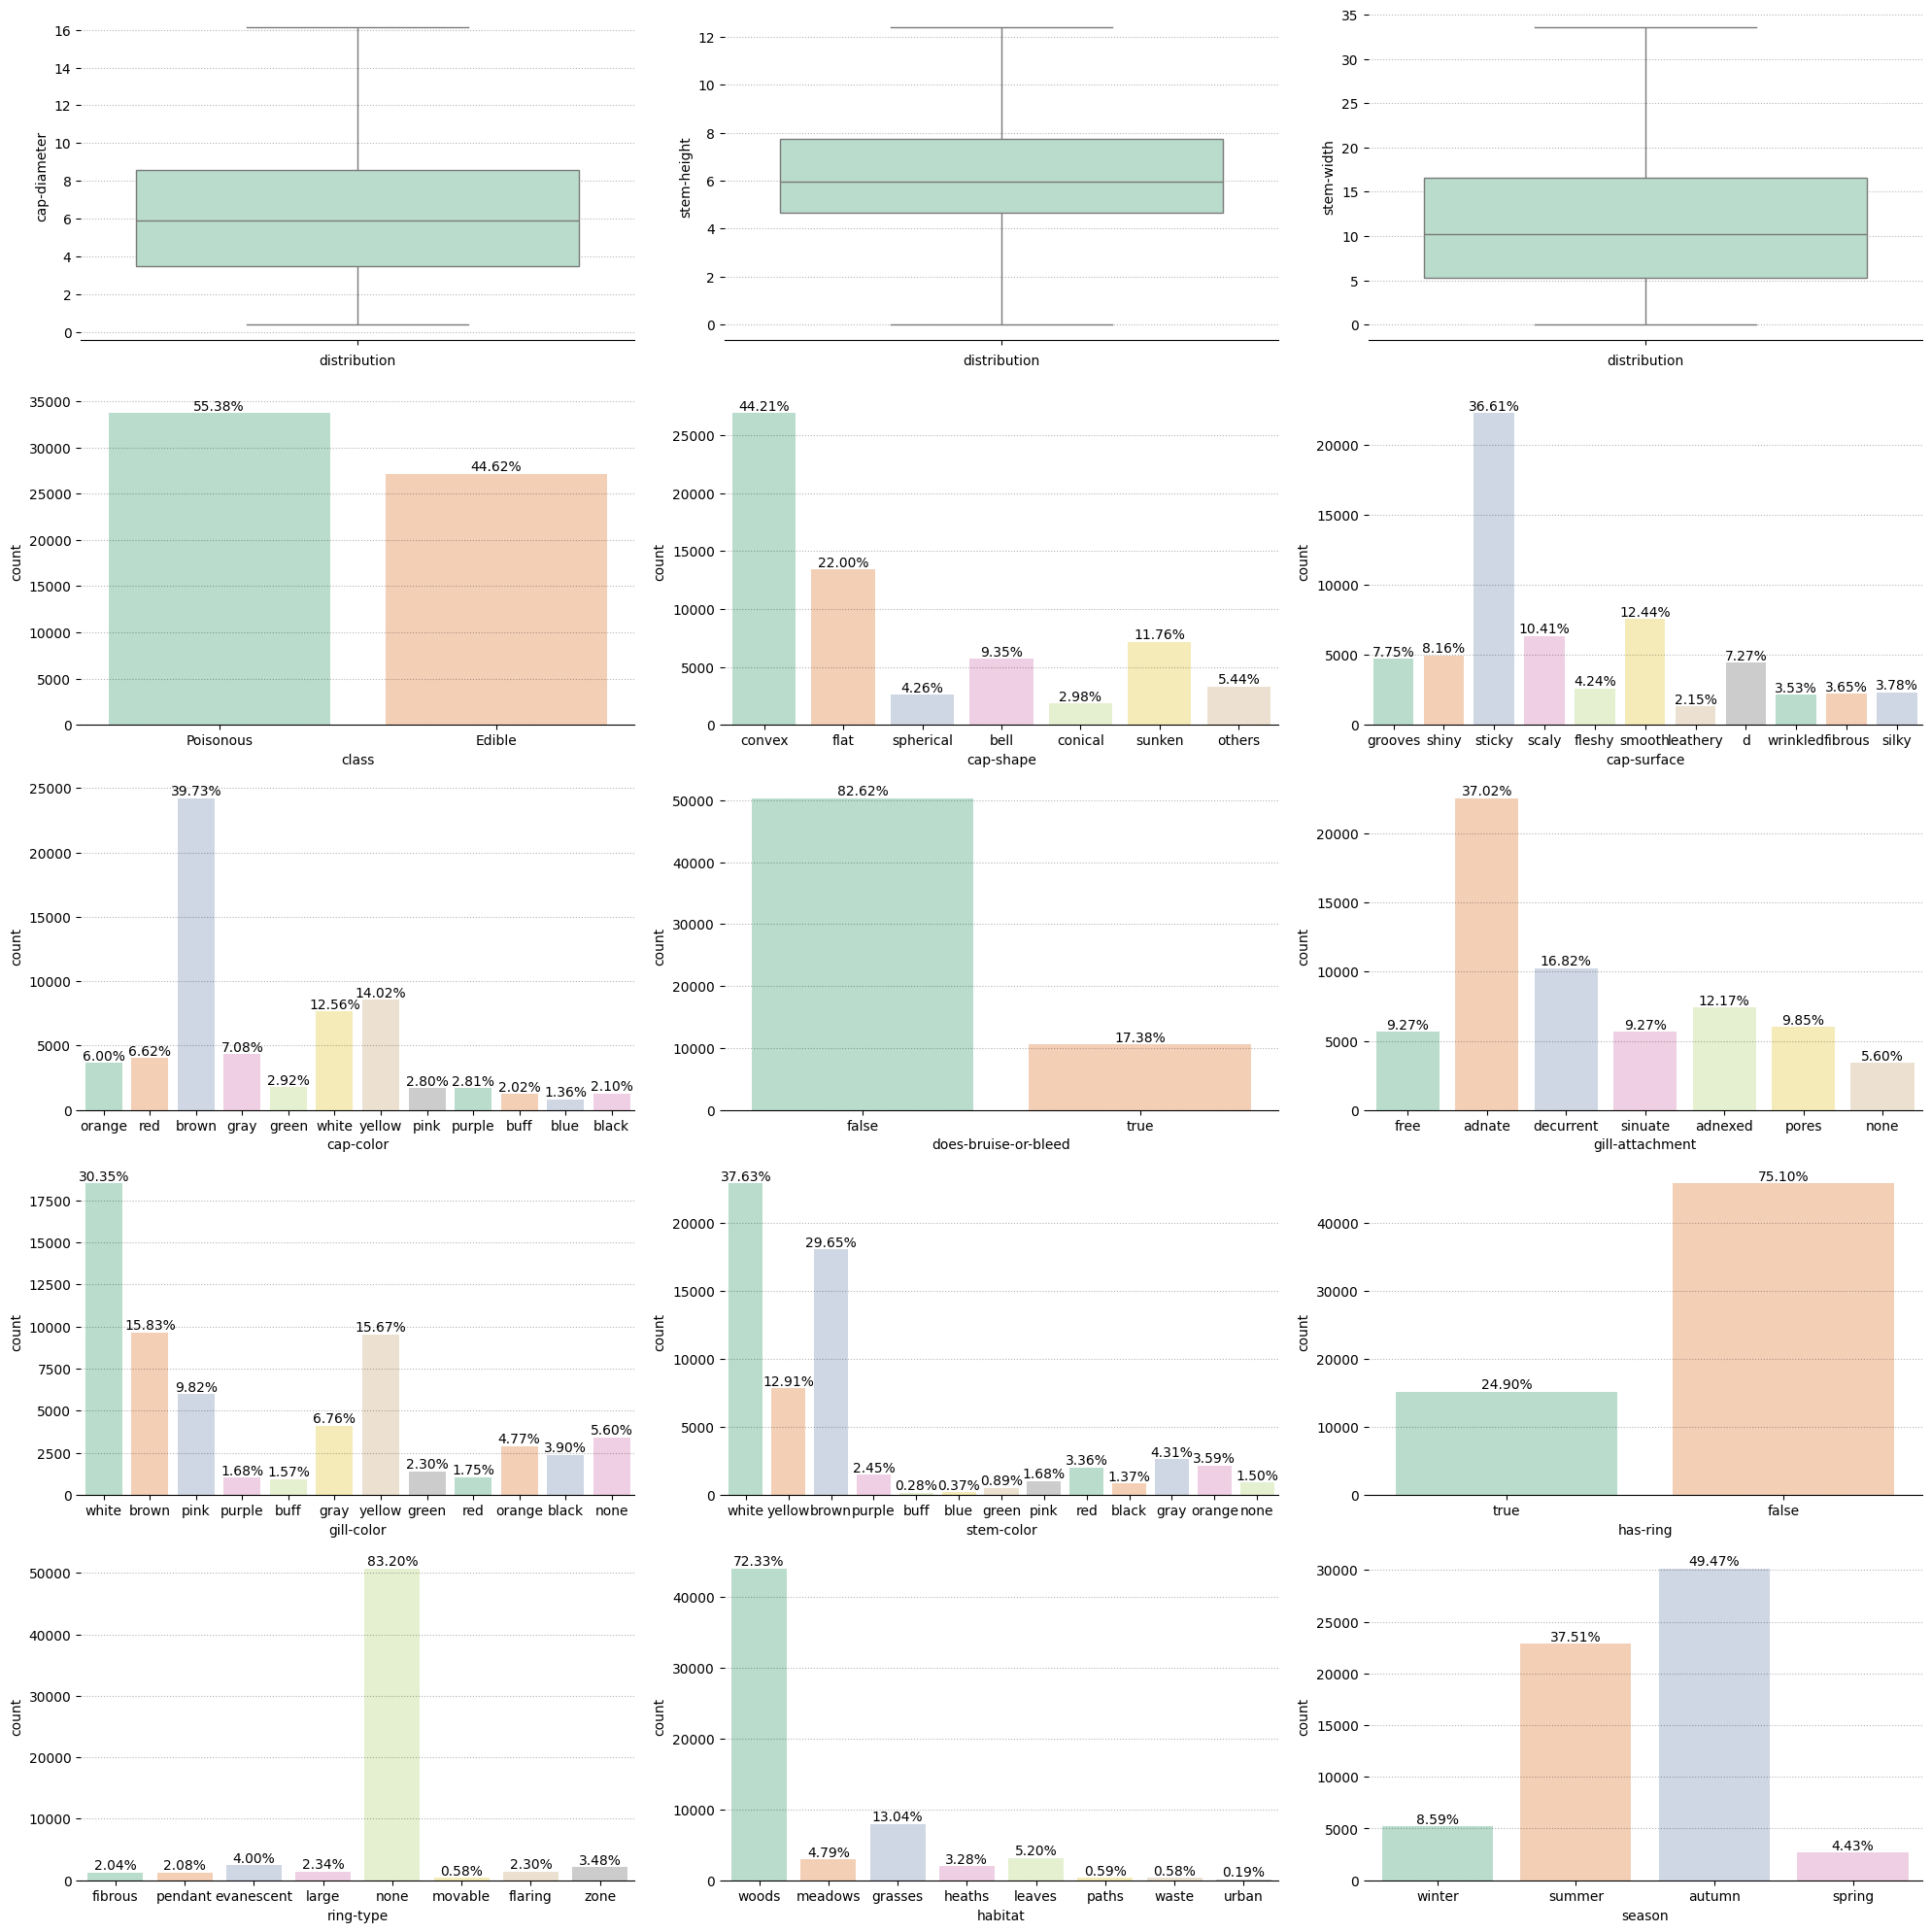

In [26]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))
axes = axes.flatten()

# Boxplots for numerical columns
for i, cols in enumerate(num_cols):
    sns.boxplot(ax=axes[i], data=df_copy, y=cols, palette='Pastel2')
    section(axes[i])
    gridlines(axes[i])
    axes[i].set_xlabel('distribution')
    axes[i].set_ylabel(cols)

# Countplots for categorical columns
for i, cols in enumerate(cat_cols):
    sns.countplot(ax=axes[i+3], data=df_copy, x=cols, palette='Pastel2')
    section(axes[i+3])
    gridlines(axes[i+3])
    axes[i+3].set_xlabel(cols)
    axes[i+3].set_ylabel('count')

    total_count = len(df_copy[cols])

    for container in axes[i+3].containers:
        for bar in container:
            height = bar.get_height()
            percentage = (height / total_count) * 100
            axes[i+3].text(
                bar.get_x() + bar.get_width() / 2,
                height,
                f'{percentage:.2f}%',
                ha='center',
                va='bottom'
            )

plt.tight_layout()
plt.show()


**Bi-variate Analysis**

<Figure size 1000x700 with 0 Axes>

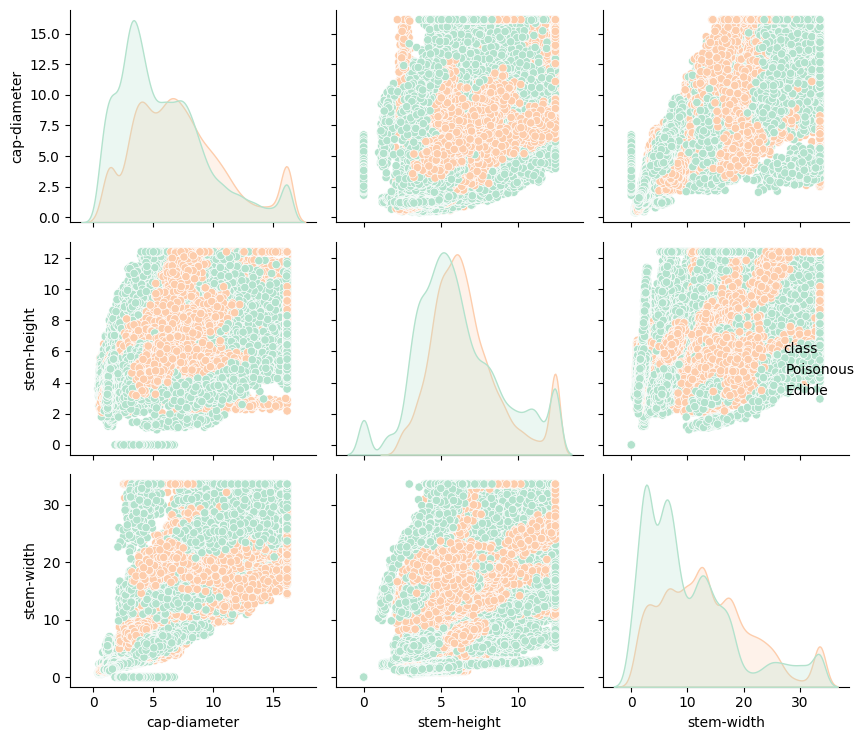

In [27]:
# Create pairplot for numerical columns
plt.figure(figsize=(10, 7))
pairplot = sns.pairplot(df_copy, vars=['cap-diameter', 'stem-height', 'stem-width'], diag_kind='kde',hue='class',palette='Pastel2')
plt.tight_layout()
plt.show()

<Figure size 800x300 with 0 Axes>

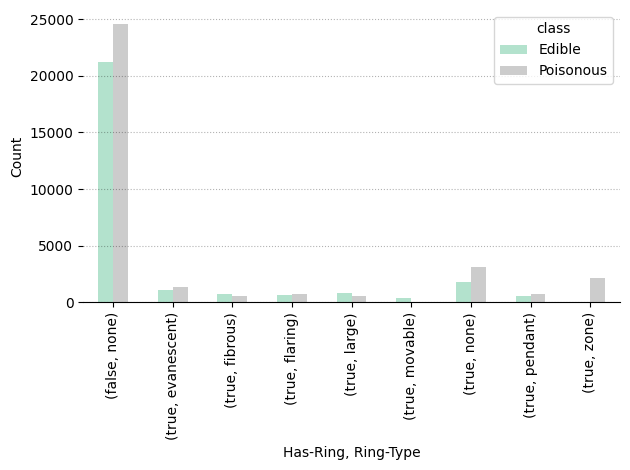

In [28]:
# relationship between 'ring-type' and 'has-ring' with class as hue
crosstab = pd.crosstab([df_copy['has-ring'], df_copy['ring-type']], df_copy['class'])
plt.figure(figsize=(8,3))
plot = crosstab.plot(kind='bar', stacked=False, colormap='Pastel2')
section(plot)
gridlines(plot)

plt.xlabel('Has-Ring, Ring-Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

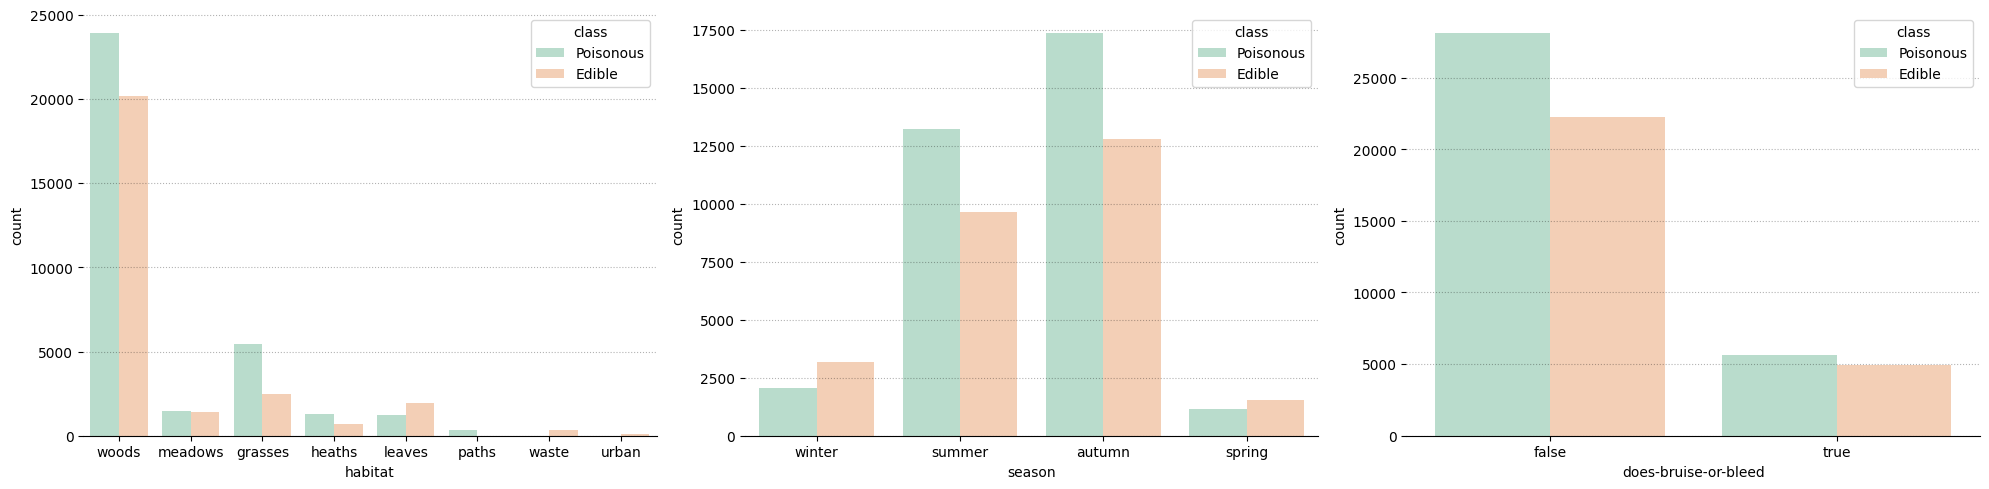

In [29]:
# Analysis on Habitat, Season and Bruise or Bleed with respect to Class
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

cols = ['habitat', 'season', 'does-bruise-or-bleed']
for i, col in enumerate(cols):
    sns.countplot(ax=axes[i], data=df_copy, x=col, hue='class', palette='Pastel2')
    section(axes[i])
    gridlines(axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('count')

plt.tight_layout()
plt.show()

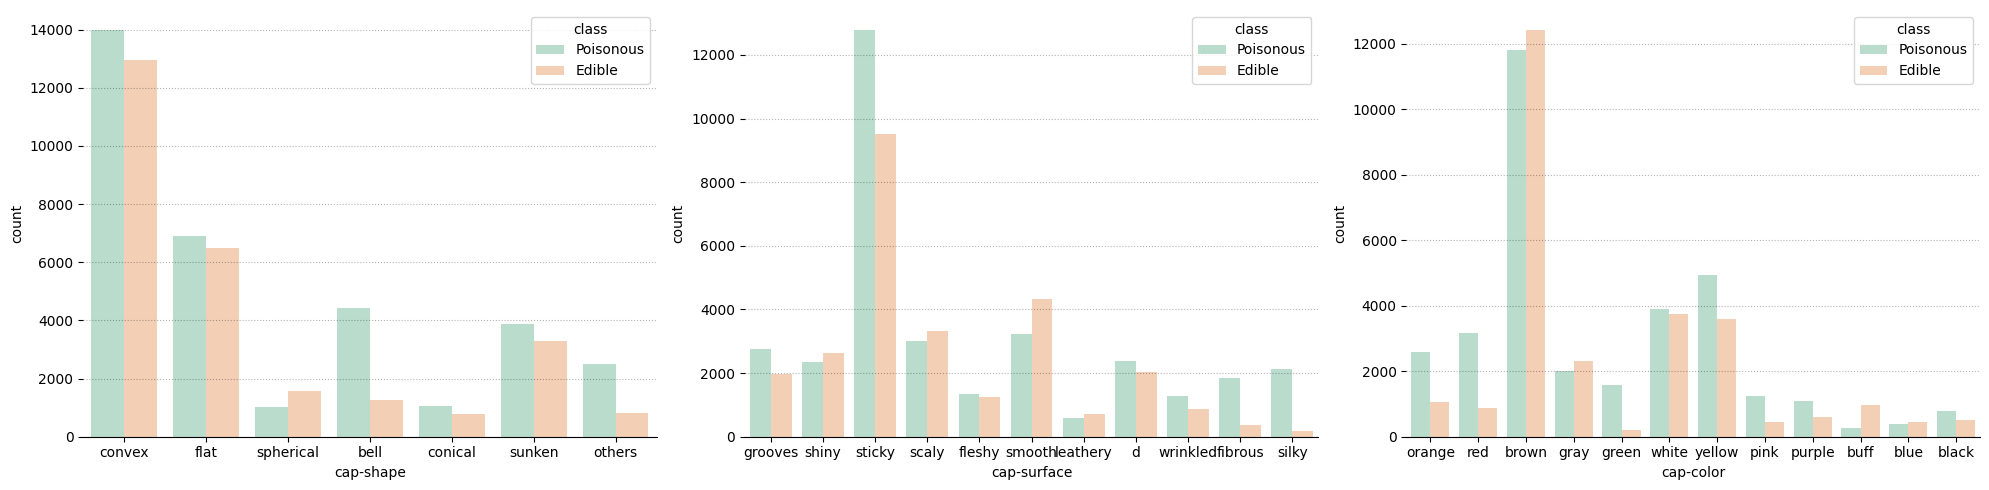

In [30]:
# Analysis on cap-shape, cap-surface and cap-color with respect to Class
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

cols = ['cap-shape', 'cap-surface', 'cap-color']
for i, col in enumerate(cols):
    sns.countplot(ax=axes[i], data=df_copy, x=col, hue='class', palette='Pastel2')
    section(axes[i])
    gridlines(axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('count')

plt.tight_layout()
plt.show()

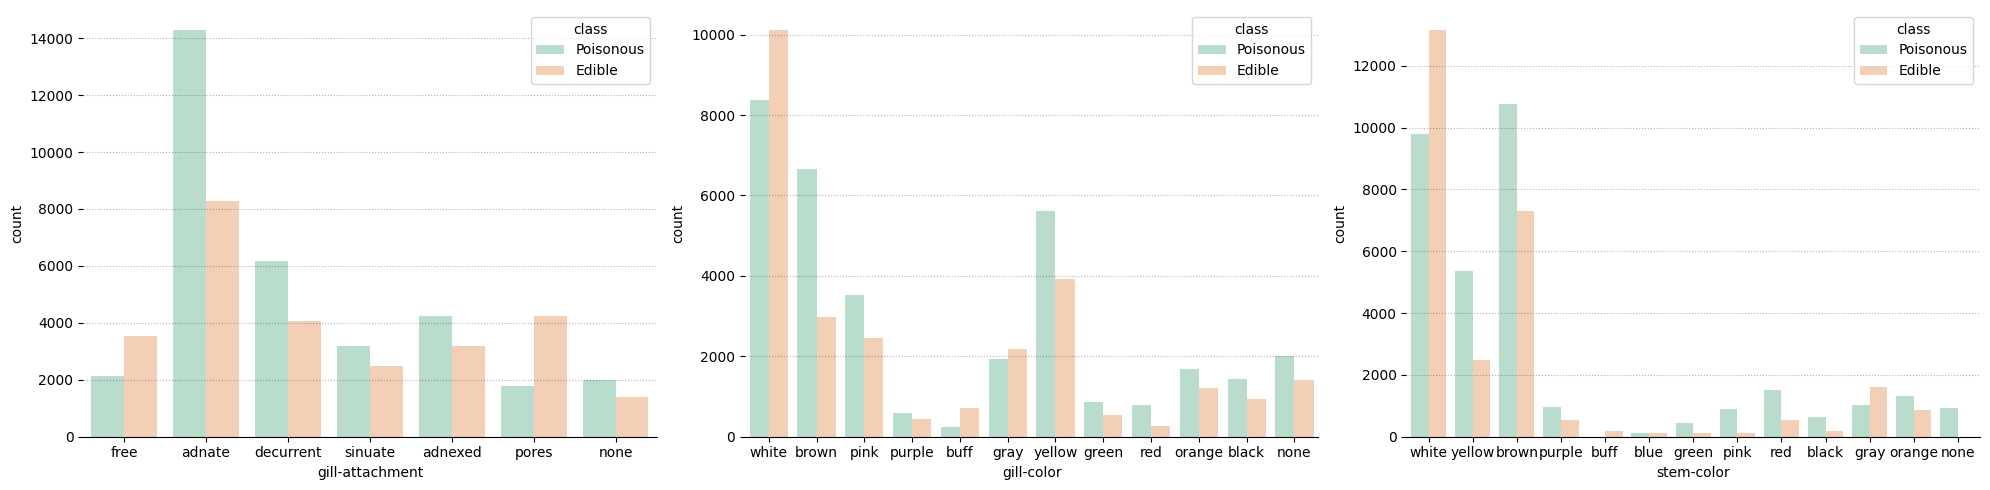

In [31]:
# Analysis on gill-attachment, gill-color and stem-color with respect to Class
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

cols = ['gill-attachment', 'gill-color', 'stem-color']
for i, col in enumerate(cols):
    sns.countplot(ax=axes[i], data=df_copy, x=col, hue='class', palette='Pastel2')
    section(axes[i])
    gridlines(axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('count')

plt.tight_layout()
plt.show()

### **OBSERVATION:**
**Data Cleaning and Data Transformation**
1. After handling missing values and duplicate rows, the dataset now contains 15 columns and 60923 rows
2. The dataset includes less than 7% of outliers, which is minimal and doesn't significantly impact the analysis. But for our analysis purpose we treated the outliers using capping method

**Univariate Analysis**
1. The dataset shows a balanced distribution between the two target classes: 44.62% of the mushrooms are edible, and 55.38% are poisonous.
2. Below is the table which represents the percentage of most frequent categorical for all categorical variables

| Variable Name            | Most Common Category   | Percentage |
|-------------------------|-----------------------|------------|
| class                   | p - poisonous         | 55.38      |
| cap-shape               | x - convex            | 44.21      |
| cap-surface             | t - sticky            | 36.61      |
| cap-color               | n - brown             | 39.73      |
| does-bruise-or-bleed   | f - false             | 82.62      |
| gill-attachment         | a - adnate            | 37.02      |
| gill-color              | w - white             | 30.35      |
| stem-color              | w - white             | 37.63      |
| has-ring                | f - false             | 75.1       |
| ring-type               | f - none              | 83.2       |
| habitat                 | d - woods             | 72.33      |
| season                  | a - autumn            | 49.47      |

3. From the table, we can observe that for some variables, a single category represents more than 50% of the total data. For instance: does-bruise-or-bleed and ring-type have false and none categories dominating with 82.62% and 83.2%, respectively. This skewed distribution could influence the analysis and model performance, and we may consider addressing it during model building.

**Bi-Variate Analysis**

*Numeric Features*
1. Strong correlations exist among all numeric columns.
2. Large cap diameter, stem height, and width are good indicators of edible mushrooms.
3. Very large mushrooms are easily distinguishable; however, medium-sized mushrooms have an equal distribution of edibles and poisoners.
4. Mushrooms with minimum stem height, width, and cap diameter predominantly belong to the poisonous category.
*Categorical Features*
1. Most mushrooms without rings are poisonous; all movable ring types are edible, while zoned rings indicate poisonous mushrooms.
2. 100% of edible mushrooms are found in urban and waste habitats, whereas all poisonous mushrooms are located in paths. Among habitats with both types, leaf litter tends to have more edibles. Woods contain a higher number of poisonous mushrooms than edibles.
3. Autumn shows peak growth for mushrooms; spring and winter see a slight increase in edible varieties.
4. Only spherical cap shapes predominantly feature edible mushrooms, while bell-shaped mushrooms are mostly poisonous.
5. Silky or fibrous cap surfaces are associated with higher toxicity, whereas shiny, scaly, or smooth surfaces indicate edibility.
6. Specific gill-attachments and colors, particularly adnate and yellow gills, correlate with poisonous mushrooms.
7. Green cap-colored mushrooms are mostly poisonous, while brown, gray, and buff mushrooms are primarily edible.
8. White and yellow stem colors are more often associated with edible mushrooms.

<a name="Data_Preprocessing"></a>
## **DATA PREPROCESSING**

**GOAL:**

1. Prepare the data to use for training the model by spliting the data into Independant and Dependant variables
2. Handle imbalance data if required - SMOTE
3. Convert all the categorical columns to numerical columns via Encoding
4. Perform Standardization for numerical columns incase required
5. Correlation Analysis for feature selection

### **Independant and Dependant Variables**

We are splitting the data into Independant and Dependant variables which will be further used for model training

In [32]:
x = df_copy.drop(columns=['class'])
y = df_copy['class']
print(f"Independent DataFrame Shape : {x.shape}")
print(f"Dependent DataFrame Shape : {y.shape}")

Independent DataFrame Shape : (60923, 14)
Dependent DataFrame Shape : (60923,)


### **Check for Imbalance Data**

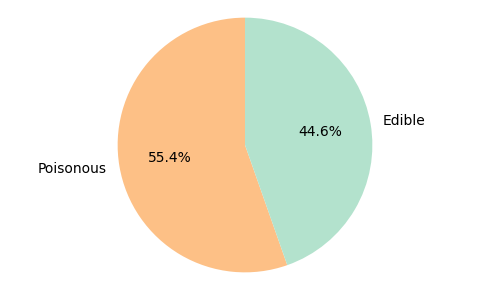

In [33]:
plt.figure(figsize=(5,3))

value_counts = y.value_counts()
labels = value_counts.index
sizes = value_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#FDC086','#B3E2CD'])
plt.axis('equal')

plt.tight_layout()
plt.show()

Looking at the data split between edible(44.6%) and poisonous(55.4%), SMOTE is not required. However post evaluating the performance if we encounter issues with predicting the edible class, we can consider experimenting with SMOTE

### **Encoding and Standardization**

For further analysis we have to convert our categorical columns to numerical columns via encoding. Since all our categorical columns has nominal data we are going to perform one hot encoding

In [34]:
# One hot encoding
x_encoded = pd.get_dummies(x, drop_first=True, dtype='int')
print(f"Number of Rows: {x_encoded.shape[0]}\nNumber of Columns: {x_encoded.shape[1]}")

Number of Rows: 60923
Number of Columns: 78


In [35]:
# One hot encoding
y_encoded = pd.get_dummies(y, drop_first=True, dtype='int')
print(f"Number of Rows: {y_encoded.shape[0]}\nNumber of Columns: {y_encoded.shape[1]}")

Number of Rows: 60923
Number of Columns: 1


In [36]:
cat_cols = x_encoded.columns[3:]
num_cols = x_encoded.columns[:3]
print(f"Number of Numerical Columns: {len(num_cols)}")
print(f"Number of Categorical Columns: {len(cat_cols)}")

Number of Numerical Columns: 3
Number of Categorical Columns: 75


Based on descripition we can see that cap-diameter and stem-height are in cm, whereas stem-width is in mm. So first we have to convert mm to cm and then proceed with standardization

In [37]:
# mm to cm conversion
x_encoded['stem-width'] = x_encoded['stem-width']/10

In [38]:
# Standardization
scaler = StandardScaler()
x_encoded[num_cols] = scaler.fit_transform(x_encoded[num_cols])

x_encoded.head()

,cap-diameter,stem-height,stem-width,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_others,cap-shape_spherical,cap-shape_sunken,cap-surface_fibrous,cap-surface_fleshy,cap-surface_grooves,cap-surface_leathery,cap-surface_scaly,cap-surface_shiny,cap-surface_silky,cap-surface_smooth,cap-surface_sticky,cap-surface_wrinkled,cap-color_blue,cap-color_brown,cap-color_buff,cap-color_gray,cap-color_green,cap-color_orange,cap-color_pink,cap-color_purple,cap-color_red,cap-color_white,cap-color_yellow,does-bruise-or-bleed_true,gill-attachment_adnexed,gill-attachment_decurrent,gill-attachment_free,gill-attachment_none,gill-attachment_pores,gill-attachment_sinuate,gill-color_brown,gill-color_buff,gill-color_gray,gill-color_green,gill-color_none,gill-color_orange,gill-color_pink,gill-color_purple,gill-color_red,gill-color_white,gill-color_yellow,stem-color_blue,stem-color_brown,stem-color_buff,stem-color_gray,stem-color_green,stem-color_none,stem-color_orange,stem-color_pink,stem-color_purple,stem-color_red,stem-color_white,stem-color_yellow,has-ring_true,ring-type_fibrous,ring-type_flaring,ring-type_large,ring-type_movable,ring-type_none,ring-type_pendant,ring-type_zone,habitat_heaths,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,season_spring,season_summer,season_winter
0,2.283704,2.293353,0.631094,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,2.511818,2.293353,0.761535,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,1.975233,2.293353,0.708173,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,2.001155,2.293353,0.499467,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
4,2.122988,2.293353,0.644138,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1


### **Feature Selection**

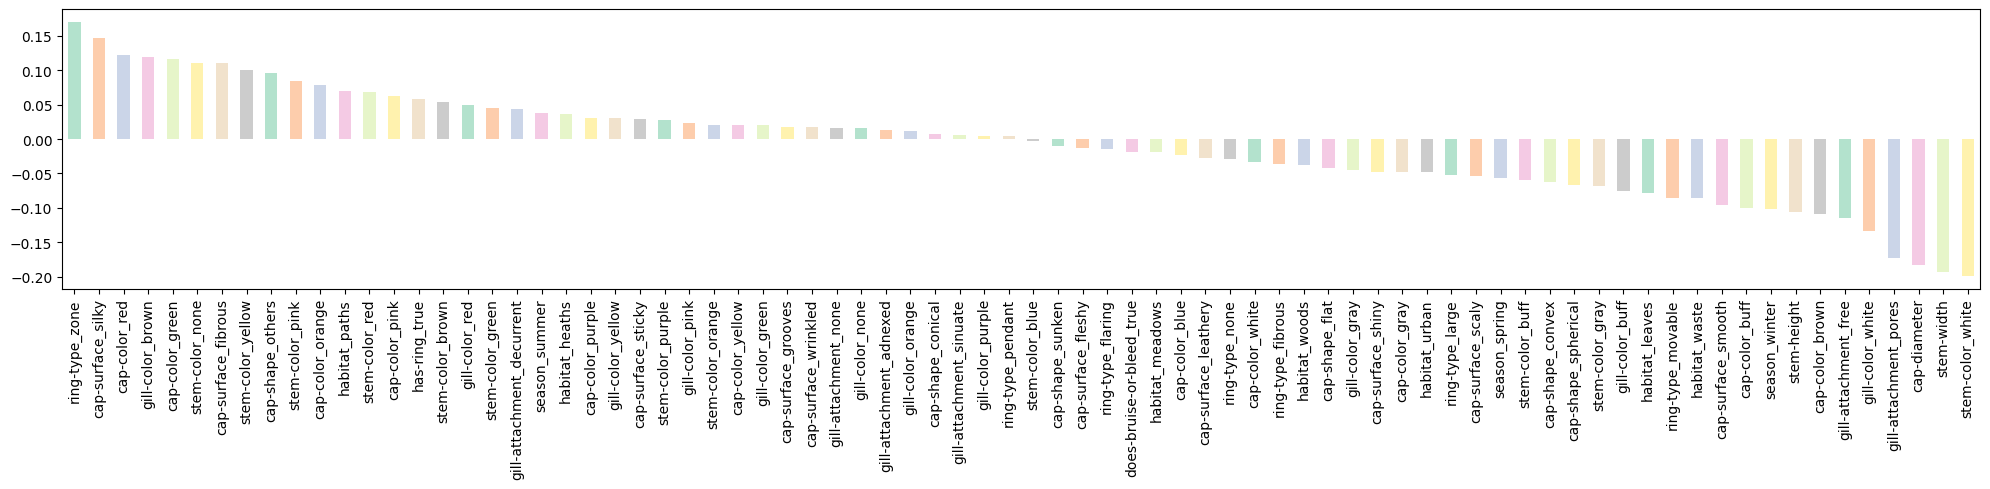

In [39]:
# Get Correlation of "Class" with other variables for feature selection
plt.figure(figsize=(20,5))
palette = sns.color_palette("Pastel2")
data_combined = pd.concat([x_encoded, y_encoded], axis=1)
corr = data_combined.corr()['Poisonous'].sort_values(ascending = False)
corr.drop('Poisonous',inplace=True)
corr.plot(kind='bar',color=palette)
plt.tight_layout()
plt.show()

From the above graph we can interpret the correlation of each variable with the target variable (Poisonous)

**Positively correlated:** ring-type_zone, cap-surface_silky, gill-color_yellow, stem-root_uneven

**Negatively correlated:** stem-color_white, gill-attachment_free, cap-diameter, gill-color_white

**Weekly correlated:** gill-attachment_none, cap-shape_conical, cap-surface_smooth

To eliminate weekly correlated variables we can do Threshold based feature selection. Lets set the Threshold to be 0.1 for feature selection

In [40]:
# Threshold based feature selection
data_combined = pd.concat([x_encoded, y_encoded], axis=1)
corr_matrix = data_combined.corr()

# Extract correlation values for the target variable
corr_target = corr_matrix['Poisonous'].sort_values(ascending=False)
corr_target = corr_target.drop('Poisonous') # Exclude the target variable itself

threshold = 0.05
selected_features = corr_target[abs(corr_target) >= threshold]

print("Selected features for further analysis and their relation with target variable (Poisonous)")
selected_features

Selected features for further analysis and their relation with target variable (Poisonous)


,Poisonous
ring-type_zone,0.170335
cap-surface_silky,0.146560
cap-color_red,0.122188
gill-color_brown,0.119418
cap-color_green,0.116829
stem-color_none,0.110829
cap-surface_fibrous,0.109788
stem-color_yellow,0.099916
cap-shape_others,0.095256
stem-color_pink,0.083520


In [41]:
x_final = data_combined[selected_features.index]
y_final = data_combined['Poisonous']
print(f"Number of Rows: {x_final.shape[0]}\nNumber of Columns: {x_final.shape[1]}")

Number of Rows: 60923
Number of Columns: 38


### **OBSERVATION**
1. **One-Hot Encoding Impact:** Following the application of one-hot encoding, we observed a significant increase in the number of columns within our dataset, reflecting the transformation of categorical variables into multiple binary features.
2. **Feature Selection:** Utilizing a threshold-based feature selection method, we systematically evaluated the correlation matrix and eliminated several columns to enhance model efficiency and performance.

<a name="Data_Modeling"></a>
## **DATA MODELING**
**GOAL:**
1. Split the data into Training and Testing sets
2. Choose the Type of model and select the algorithms based on that to train them with our data
  * Decision Tree
  * Random Forest
  * K Nearest Neighbour
  * Naive Bayes
  * Logistic Regression
  * Support Vector Machine
  * XG-Boost

### **Train - Test Split**

In [42]:
# Creating train/test split using 80% data for training and 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x_final, y_final, test_size=0.2, random_state=42)

# Calculate percentages
total_rows = x_final.shape[0]
num_train_rows = x_train.shape[0]
num_test_rows = x_test.shape[0]
train_percentage = (num_train_rows / total_rows) * 100
test_percentage = (num_test_rows / total_rows) * 100

print(f"Number of Rows in Training Set: {num_train_rows} ({train_percentage:.2f}%)")
print(f"Number of Rows in Testing Set: {num_test_rows} ({test_percentage:.2f}%)")

Number of Rows in Training Set: 48738 (80.00%)
Number of Rows in Testing Set: 12185 (20.00%)


### **Training Different Models**

In [43]:
# Defining some empty dfs to record metrics from each model and stage of analysis
column_names = ["method","accuracy","precision","recall","f1","roc_auc"]
performance_metrics = pd.DataFrame(columns=column_names)

#### **Decision Tree**

We create a loop to find the optimum depth to determine the max_depth for our Decision Tree Classification

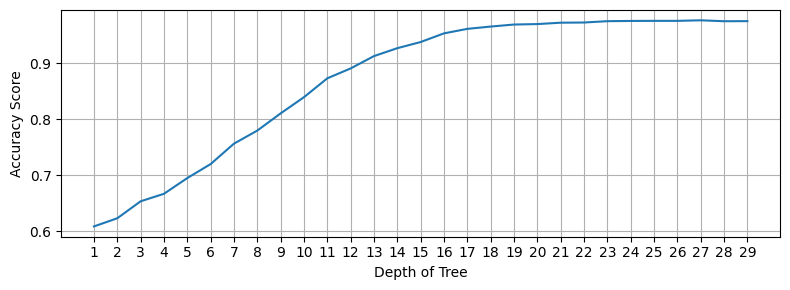

In [44]:
# Find the depth - we are creating a loop to get the optimum depth
k_values = range(1,30)
depth = []

for k in k_values:
  dt = DecisionTreeClassifier(random_state=42, max_depth=k)
  dt.fit(x_train, y_train)
  depth.append(dt.score(x_test, y_test))

plt.figure(figsize=(8,3))
plt.plot(k_values,depth)
plt.xlabel("Depth of Tree")
plt.ylabel("Accuracy Score")
plt.xticks(k_values)
plt.grid()
plt.tight_layout()
plt.show()

Based on the above graph we can see that the after a certain point, around max_depth of 12 to 15, the accuracy appears to plateau. For a max_depth selection, a value between 10 and 15 would be ideal, balancing complexity and generalization while keeping a lookout for potential overfitting. We will opt the max_depth to be 13.

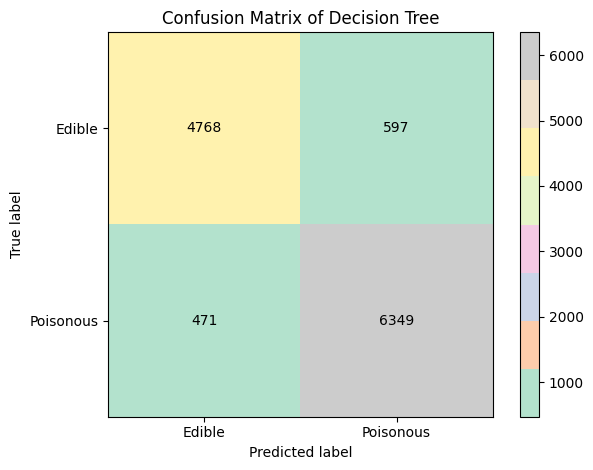

In [45]:
# Model Training
label = 'Decision Tree'
dt = DecisionTreeClassifier(random_state=42, max_depth=13,criterion='gini')

dt, performance_metrics, dt_confusion = model_predictions(dt, x_train, x_test, y_train, y_test, performance_metrics, label)
model_report(dt_confusion, confusion_lbs, label)

#### **Random Forest**

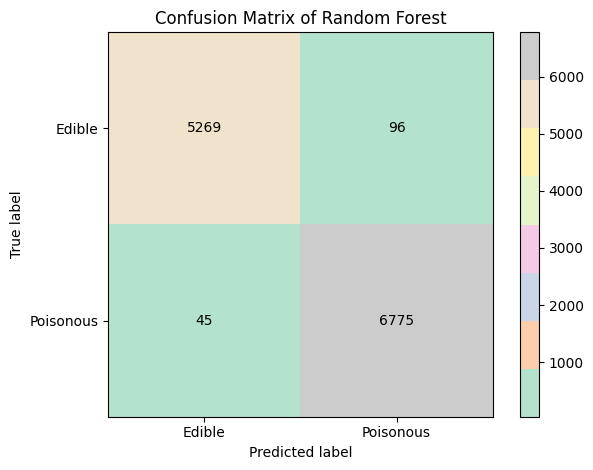

In [46]:
# Model Training
label = 'Random Forest'
rf = RandomForestClassifier(random_state=42, n_estimators=500, criterion='gini', oob_score=True)
rf, performance_metrics, rf_confusion = model_predictions(rf, x_train, x_test, y_train, y_test, performance_metrics, label)
model_report(rf_confusion, confusion_lbs, label)

#### **K Nearest Neighbour**

To identify the optimal number of neighbors (k) for a k-NN classifier, we can utilize cross-validation

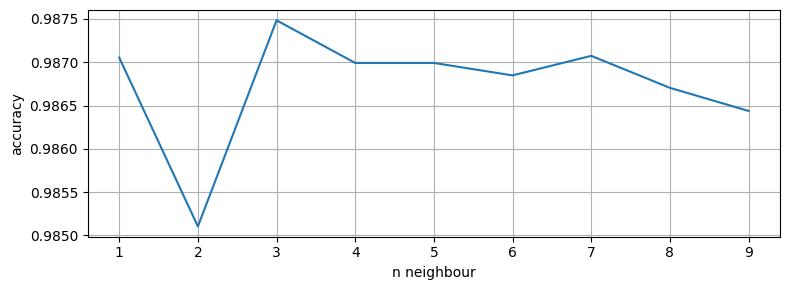

In [47]:
# Cross Validation
k_values = range(1,10)
cv_score = []
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  score = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
  cv_score.append(score.mean())

plt.figure(figsize=(8,3))
plt.plot(k_values,cv_score)
plt.ylabel('accuracy')
plt.xlabel('n neighbour')
plt.xticks(k_values)
plt.grid()
plt.tight_layout()
plt.show()

Based on the graph, the optimal value for k appears to be around 3, as this value yields the highest accuracy while balancing bias and variance

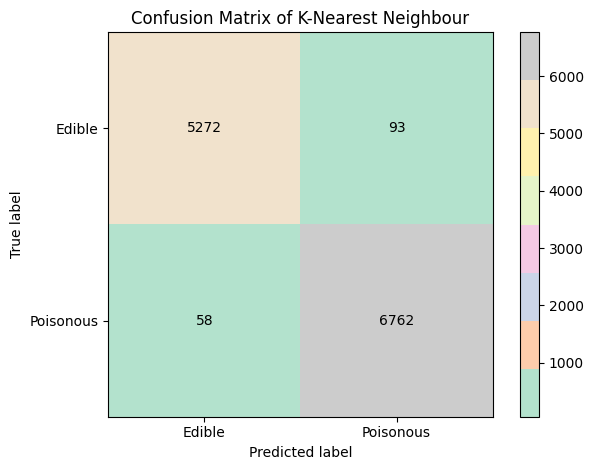

In [48]:
# Model Training
label = 'K-Nearest Neighbour'
knn = KNeighborsClassifier(n_neighbors=3)
knn, performance_metrics, knn_confusion = model_predictions(knn, x_train, x_test, y_train, y_test, performance_metrics, label)
model_report(knn_confusion, confusion_lbs, label)

#### **Naive Bayes**

For our dataset since we have numerical data with negative value we will use Gausian Naive Bayes approach. Column Transfer is not required as already we have converted all the categorical data to numerical data

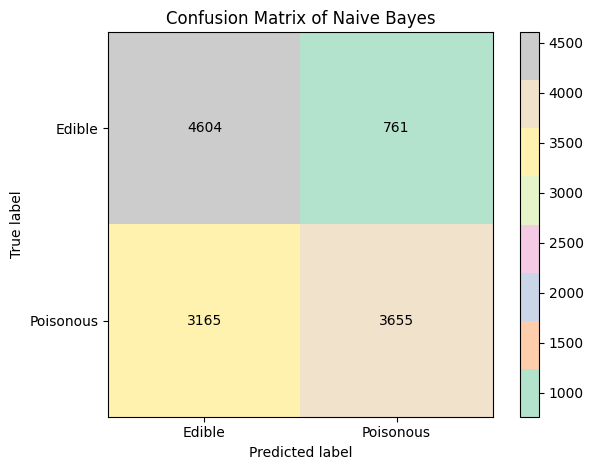

In [49]:
# Model Training
label = 'Naive Bayes'
nb = GaussianNB()
nb, performance_metrics, nb_confusion = model_predictions(nb, x_train, x_test, y_train, y_test, performance_metrics, label)
model_report(nb_confusion, confusion_lbs, label)

#### **Logistic Regression**

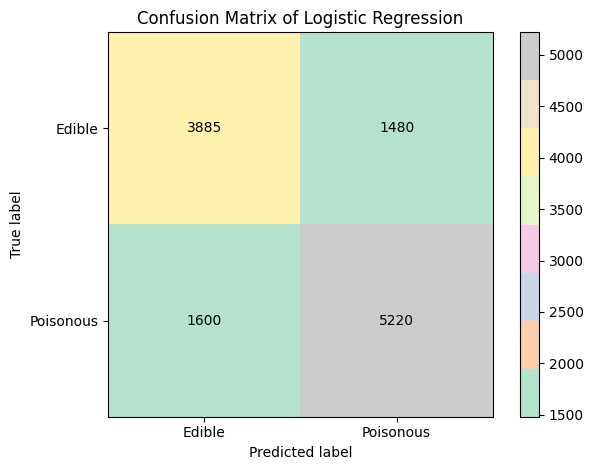

In [50]:
# Model Training
label = 'Logistic Regression'
lr = LogisticRegression(random_state=42)
lr, performance_metrics, lr_confusion = model_predictions(lr, x_train, x_test, y_train, y_test, performance_metrics, label)
model_report(lr_confusion, confusion_lbs, label)

#### **Support Vector Machine**

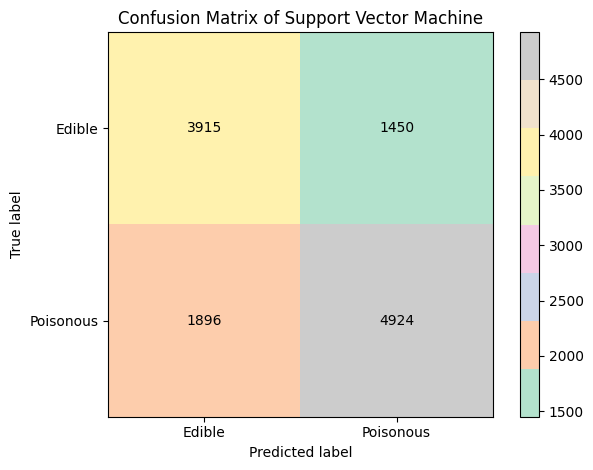

In [51]:
# Model Training
label = 'Support Vector Machine'
svm = SVC(random_state=42,kernel='linear')
svm, performance_metrics, svm_confusion = model_predictions(svm, x_train, x_test, y_train, y_test, performance_metrics, label)
model_report(svm_confusion, confusion_lbs, label)

#### **XG Boost**

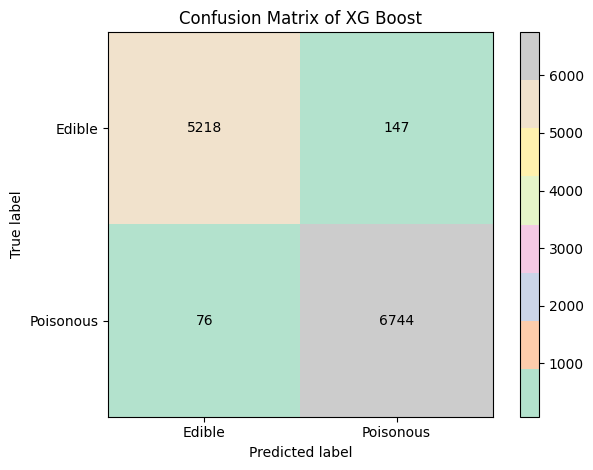

In [54]:
# Model Training
label = 'XG Boost'
xgb = xgb.XGBClassifier()
xgb, performance_metrics, xgb_confusion = model_predictions(xgb, x_train, x_test, y_train, y_test, performance_metrics, label)
model_report(xgb_confusion, confusion_lbs, label)

<a name="Model_Evaluation"></a>
## **MODEL EVALUATION**
**GOAL:**
1. Compare prediction metrices for all the above created algorithm's
2. Plot ROC Curve with AUC score
3. Analyze and find which algorithm provides us the most promising model for our classification problem

### **Compare Prediction Metrices**

In [55]:
# Examining metrics dataframe
performance_metrics

,method,accuracy,precision,recall,f1,roc_auc
0,Decision Tree,91.24,91.41,93.09,92.24,90.98
1,Random Forest,98.84,98.60,99.34,98.97,98.78
2,K-Nearest Neighbour,98.76,98.64,99.15,98.90,98.71
3,Naive Bayes,67.78,82.77,53.59,65.06,69.70
4,Logistic Regression,74.72,77.91,76.54,77.22,74.48
5,Support Vector Machine,72.54,77.25,72.20,74.64,72.59
6,XG Boost,98.17,97.87,98.89,98.37,98.07


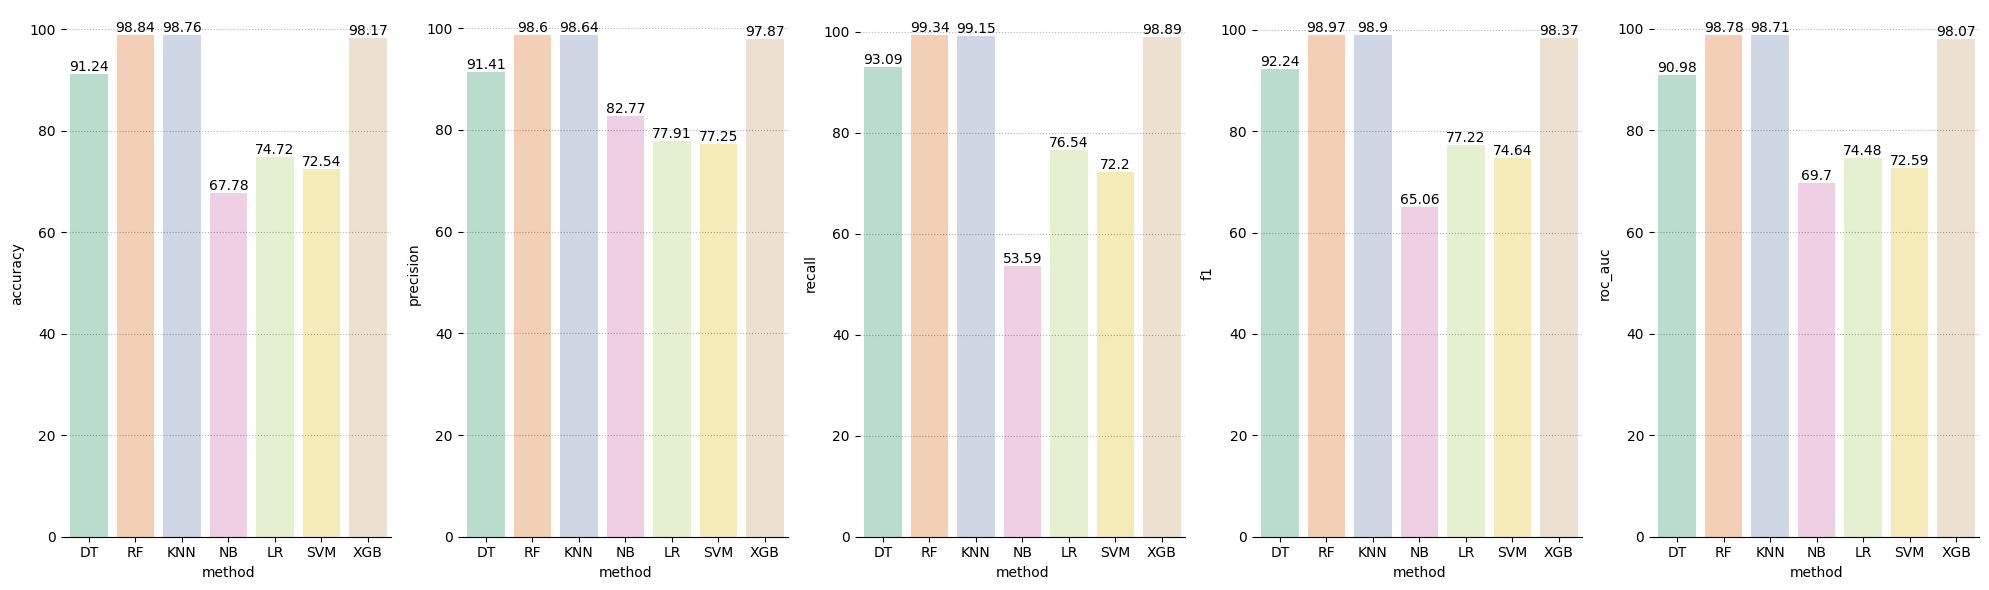

In [56]:
# Visualisation comparing all metrices
labels = ['DT','RF','KNN','NB','LR','SVM','XGB']

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 6))
axes = axes.flatten()

cols = performance_metrics.columns[1:]

for i, metric in enumerate(cols):
  sns.barplot(x='method',y=metric, data=performance_metrics, palette='Pastel2', ax=axes[i])
  section(axes[i])
  gridlines(axes[i])

  axes[i].set_ylabel(metric)
  axes[i].set_xticklabels(labels, rotation=0)

  for j in axes[i].containers:
    axes[i].bar_label(j)

plt.tight_layout()
plt.show()

### **ROC curve with AUC score**

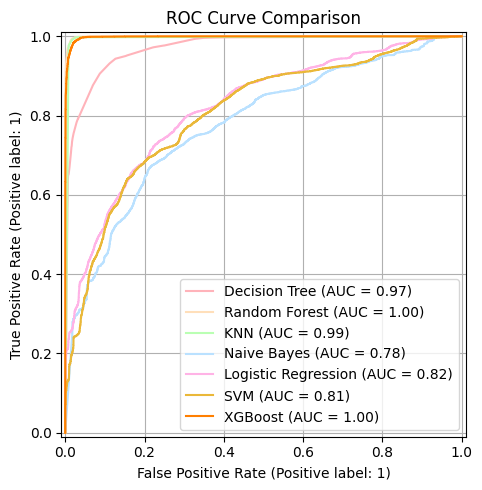

In [57]:
# Plotting ROC Curve with AUC Score
models = {
    'Decision Tree': dt,
    'Random Forest': rf,
    'KNN': knn,
    'Naive Bayes': nb,
    'Logistic Regression': lr,
    'SVM': svm,
    'XGBoost': xgb
}

fig = plt.figure(figsize=(8, 5))

colors = ['#FFB3BA','#FFDFBA','#BAFFB3','#BAE1FF','#FFB3E6','#EAB839','#FF7F00']

for (model_name, model), color in zip(models.items(),colors):
    RocCurveDisplay.from_estimator(model, x_test, y_test, name=model_name, ax=plt.gca(),color=color)

plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()

plt.tight_layout()
plt.show()

### **Discussion**

The goal of this project was to identify the most effective algorithm for **classifying mushrooms as either edible or poisonous**. For our analysis, we tested seven different algorithms, assessing their performance based on various metrics.

After reviewing the results, we selected **precision as our primary evaluation metric**. This decision was driven by the need to minimize the risk of misclassifying poisonous mushrooms as edible. A higher precision ensures that the model is accurately identifying poisonous mushrooms, thus reducing the likelihood of false positives—cases where the model incorrectly predicts that a poisonous mushroom is edible.

Precision is calculated as:
**Precision = True Positives / (True Positives + False Positives)**

A high precision means that when the model classifies a mushroom as poisonous, it is very likely to be correct. This is crucial for ensuring safety, as eating a poisonous mushroom due to a false prediction could have severe consequences.

### **Conclusion**

Based on our primary metric - precision we found that the **K-Nearest Neighbors (KNN) algorithm outperformed the others, achieving the highest precision score**. Therefore, KNN is the most effective model for this task, offering the best balance of accuracy and safety in classifying mushrooms.

Let us see the important features which contribute to our algorithm

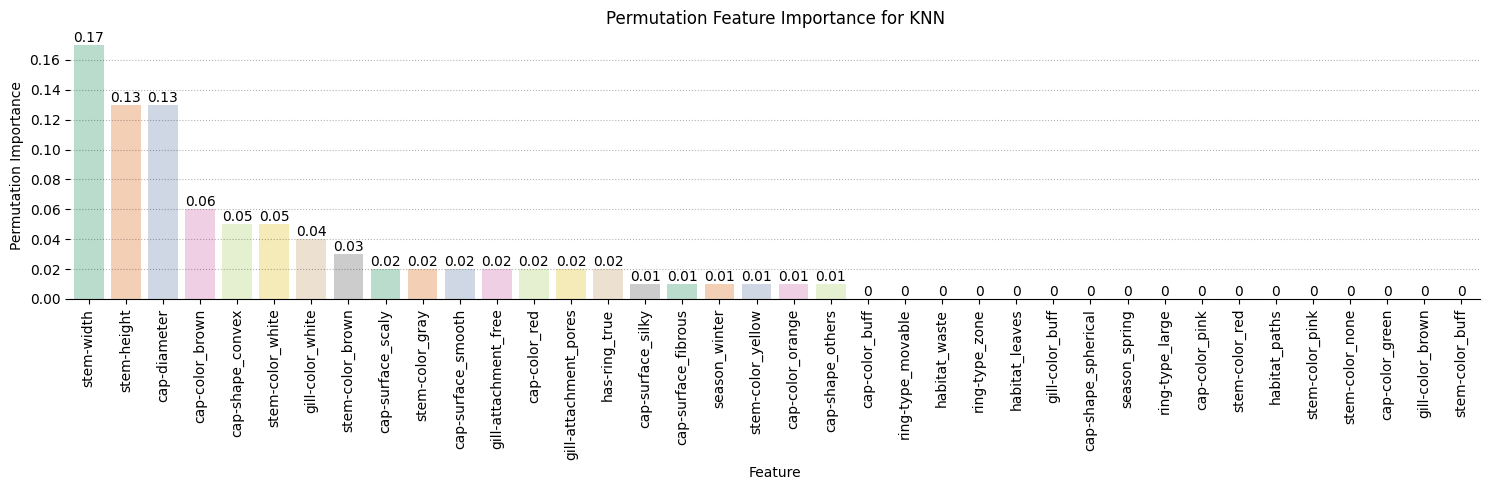

In [92]:
# Feature Importance
# For testing purpose we are picking up a sample of data from our original data to select the important feature
sample = x_test.sample(500,random_state=42)
label = y_test.sample(500,random_state=42)
result = permutation_importance(knn, sample, label, n_repeats=10, random_state=42)

importance = pd.DataFrame({'Feature':x_train.columns,'Importance':result.importances_mean.round(2)})
importance = importance.sort_values(by='Importance', ascending=False).reset_index(drop=True)

plt.figure(figsize=(15, 5))


barplot = sns.barplot(data= importance,x='Feature',y='Importance',palette='Pastel2')
plt.xlabel("Feature")
plt.ylabel('Permutation Importance')
plt.title('Permutation Feature Importance for KNN')
for i in range(0,len(importance)):
  barplot.bar_label(barplot.containers[i])
plt.xticks(rotation=90)
section(barplot)
gridlines(barplot)

plt.tight_layout()
plt.show()

From the above picture we can see that features like **stem-width, stem-height and cap-diameter** play an important role in mushroom classification